## Load Data(train.txt, val.txt, test.txt)

In [1]:
#load data
import pandas as pd
# Load train data
train_df = pd.read_csv("emotion_dataset/train.txt", sep=";", names=["text", "emotion"])
val_df = pd.read_csv("emotion_dataset/val.txt", sep=";", names=["text", "emotion"])
test_df = pd.read_csv("emotion_dataset/test.txt", sep=";", names=["text", "emotion"])
# Combine train + val (optional)
train_df = pd.concat([train_df, val_df])


## View sample from this Data:

In [2]:
#explore data
print(train_df.head())
print(train_df['emotion'].value_counts())


                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
emotion
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64


## visualise the emotions in the data: (6 emotions)


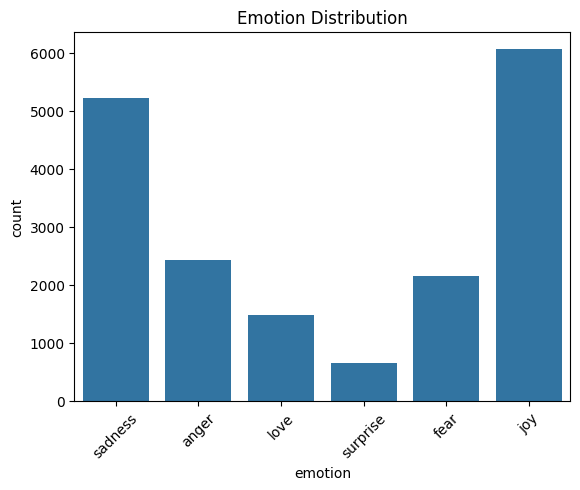

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="emotion", data=train_df)
plt.title("Emotion Distribution")
plt.xticks(rotation=45)
plt.show()


## Vectorization:

*converts raw text data into numerical features that machine learning models can understand and process.

*It helps to reduce the weight of common words (like :"the", "and")

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['emotion']
y_test = test_df['emotion']


## Chose the Best algorithm : 

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test, y_test)

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)




In [6]:
# Neural Network (MLP Classifier)
#when i run it each iteartion take 3 seconds so i reduce it to 20 to save time
mlp = MLPClassifier(max_iter=20)
mlp.fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Print all accuracies

In [7]:

print("Naive Bayes Accuracy:", nb_score)
print("Logistic Regression Accuracy:", lr_score)
print("Decision Tree Accuracy:", dt_score)
print("KNN Accuracy:", knn_score)
print("Neural Network Accuracy:", mlp_score)

Naive Bayes Accuracy: 0.7755
Logistic Regression Accuracy: 0.877
Decision Tree Accuracy: 0.8545
KNN Accuracy: 0.7495
Neural Network Accuracy: 0.8705


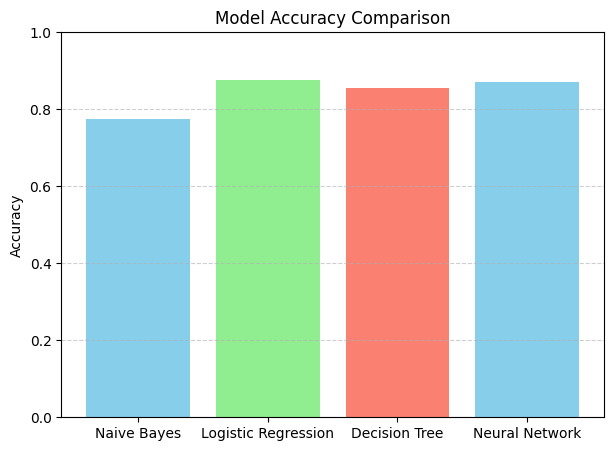

In [8]:
# Accuracy scores from earlier
accuracies = {
    'Naive Bayes': nb_score,
    'Logistic Regression': lr_score,
    'Decision Tree': dt_score,
    'Neural Network':mlp_score
}

# Bar chart
plt.figure(figsize=(7, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


as we can see the logistic regression algorithm is the best algorithm to be used with a highest score

In [9]:
#here we will evaluate
from sklearn.metrics import classification_report

preds = lr.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

       anger       0.88      0.83      0.85       275
        fear       0.88      0.81      0.84       224
         joy       0.86      0.95      0.91       695
        love       0.83      0.69      0.75       159
     sadness       0.91      0.92      0.91       581
    surprise       0.88      0.53      0.66        66

    accuracy                           0.88      2000
   macro avg       0.87      0.79      0.82      2000
weighted avg       0.88      0.88      0.87      2000



In [10]:
#Create a dictionary to map emotions to helpful, soft messages:
import random

responses = {
    "joy": ["So happy for you! 💛", "That’s amazing to hear! ☀️", "Keep shining! ✨"],
    "sadness": ["It’s okay to feel down. You're not alone 💙", "Sending you warmth 💫", "Take your time, healing isn’t linear 💧"],
    "anger": ["Anger is valid. Breathe, you’ll be okay ❤️", "Let it out safely. Then release it 🕊️", "Pause, feel, heal."],
    "love": ["Aww, love is beautiful. Stay warm and kind 💕"],
    "surprise": ["Unexpected things can be wonderful! Stay curious 🌟"],
    "fear": ["You're not alone. Face it step by step. You've got this 💪"]
}
#for more empathy Make 2–3 options per emotion and randomly choose so user feel more comfortable.
def get_response(emotion):
    return random.choice(responses.get(emotion, ["I’m here for you 💌"]))


In [11]:
#a function to ask the user for input and use the model
def predict_emotion(user_text):
    # Use the vectorizer from cell eVA8V8YCWdY2
    vec = vectorizer.transform([user_text])
    emotion = lr.predict(vec)[0]
    return emotion, random.choice(responses.get(emotion, ["I'm here for you 💌"]))


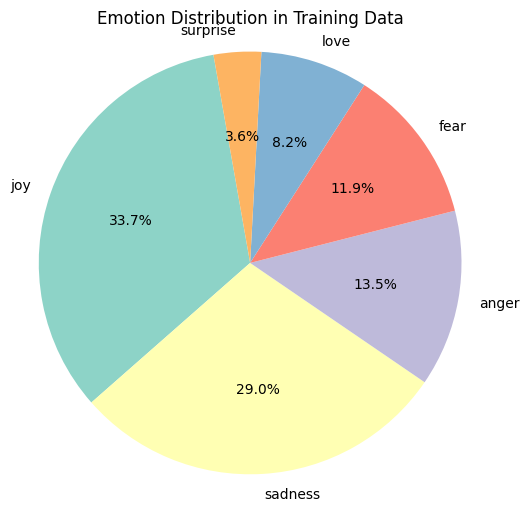

In [12]:
import matplotlib.pyplot as plt
# Count each emotion in training data
emotion_counts = train_df['emotion'].value_counts()
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=100, colors=plt.cm.Set3.colors)
plt.title('Emotion Distribution in Training Data')
plt.axis('equal')  # Make the pie chart round
plt.show()


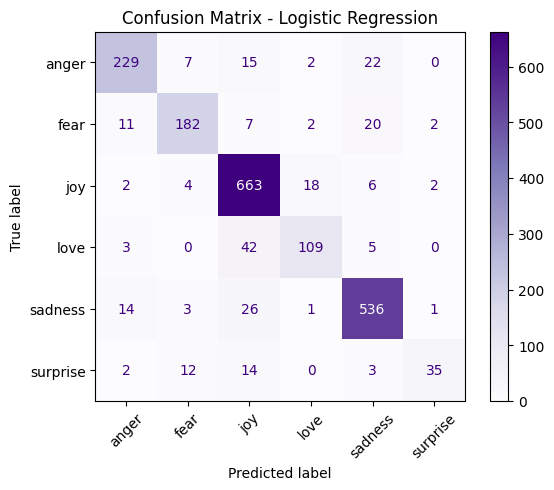

In [13]:
#se which emotions the model confuses the most
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Purples, xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
#The model tends to confuse 'fear' with 'sadness', which is expected as they share emotional tone.

this is to :
- Show how well your model performs per emotion
- Visualize which emotions get confused most
----

In [14]:
#F1-score per emotion
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

       anger       0.88      0.83      0.85       275
        fear       0.88      0.81      0.84       224
         joy       0.86      0.95      0.91       695
        love       0.83      0.69      0.75       159
     sadness       0.91      0.92      0.91       581
    surprise       0.88      0.53      0.66        66

    accuracy                           0.88      2000
   macro avg       0.87      0.79      0.82      2000
weighted avg       0.88      0.88      0.87      2000



F1-score for 'joy' is highest, showing the model handles positive emotions better than complex ones like fear.

In [15]:
#Feature importance : Shows which words most affect emotion detection
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = lr.coef_

for i, emotion in enumerate(lr.classes_):
    top = np.argsort(coefs[i])[-10:]
    print(f"Top words for {emotion}: {[feature_names[j] for j in top]}")


Top words for anger: ['bothered', 'rushed', 'rude', 'fucked', 'dissatisfied', 'greedy', 'offended', 'irritable', 'resentful', 'dangerous']
Top words for fear: ['hesitant', 'uncertain', 'paranoid', 'intimidated', 'vulnerable', 'apprehensive', 'reluctant', 'shaken', 'pressured', 'terrified']
Top words for joy: ['respected', 'popular', 'cute', 'successful', 'pleasant', 'convinced', 'innocent', 'resolved', 'superior', 'satisfied']
Top words for love: ['romantic', 'hot', 'loving', 'naughty', 'horny', 'tender', 'nostalgic', 'longing', 'caring', 'sympathetic']
Top words for sadness: ['shitty', 'unwelcome', 'disturbed', 'troubled', 'groggy', 'lousy', 'burdened', 'melancholy', 'punished', 'lethargic']
Top words for surprise: ['amazing', 'strange', 'overwhelmed', 'dazed', 'shocked', 'funny', 'surprised', 'curious', 'impressed', 'amazed']


In [ ]:
while True:
    user_input = input("💬 Tell me how you feel (or type 'exit' to stop): ")

    if user_input.lower() == 'exit':
        print("🫶 Take care! I'm always here for you.")
        break
#here we use the previous function
    emotion, reply = predict_emotion(user_input)

    # If multiple responses exist, pick randomly
    if isinstance(reply, list):
        reply = random.choice(reply)

    print(f"🧠 Detected Emotion: {emotion}")
    print(f"🤖 Response: {reply}")
    print("––––––––––––––––––––––––––––––––––––––")

every time the user types something, they get an emotion label and a sweet response.They can keep typing until they write "exit".

## Emotion Intensity Detection

Instead of just asking `“What is the emotion?”`,
we ask `“How strongly is this emotion felt?”`
It simulates real human emotion depth, not just labels.

- Create synthetic intensity score

In [ ]:
def estimate_intensity(text):
    exclamations = text.count('!')
    capitals = sum(1 for c in text if c.isupper())
    length_score = len(text) / 100  # Normalize by length
    intensity = exclamations * 0.1 + capitals * 0.05 + length_score
    return min(intensity, 1.0)  # Cap at 1.0

# Applying the work on training data
train_df['intensity'] = train_df['text'].apply(estimate_intensity)

 - Train regression model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Vectorize text
X = vectorizer.transform(train_df['text'])
y = train_df['intensity']

# Split
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
reg = RandomForestRegressor()
reg.fit(X_train_i, y_train_i)

# Predict
y_pred_i = reg.predict(X_test_i)

# Evaluation
print("R-squared:", r2_score(y_test_i, y_pred_i))
print("MSE:", mean_squared_error(y_test_i, y_pred_i))


R-squared: 0.6805730534857197
MSE: 0.02177216188081341


- visualize predictions:

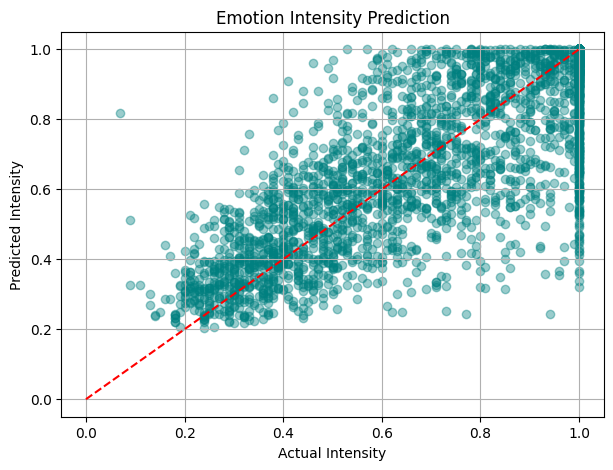

In [21]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_i, y_pred_i, alpha=0.4, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual Intensity")
plt.ylabel("Predicted Intensity")
plt.title("Emotion Intensity Prediction")
plt.grid(True)
plt.show()


Most predictions fall reasonably close to the ideal diagonal line, suggesting the regression model has learned to approximate emotional intensity based on text features.
Deviations from the line indicate that while the model captures general trends, it may struggle with subtleties in more emotionally neutral or ambiguous text samples.

---
##  Emotion Clustering:

- Vectorize and cluster

In [ ]:
from sklearn.cluster import KMeans

# Use same vectorized data
X = vectorizer.transform(train_df['text'])

# KMeans clustering
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
train_df['cluster'] = kmeans.fit_predict(X)

print(train_df[['text', 'emotion', 'cluster']].head())

                                                text  emotion  cluster
0                            i didnt feel humiliated  sadness        2
1  i can go from feeling so hopeless to so damned...  sadness        5
2   im grabbing a minute to post i feel greedy wrong    anger        1
3  i am ever feeling nostalgic about the fireplac...     love        4
4                               i am feeling grouchy    anger        4


- visualize clusters with PCA

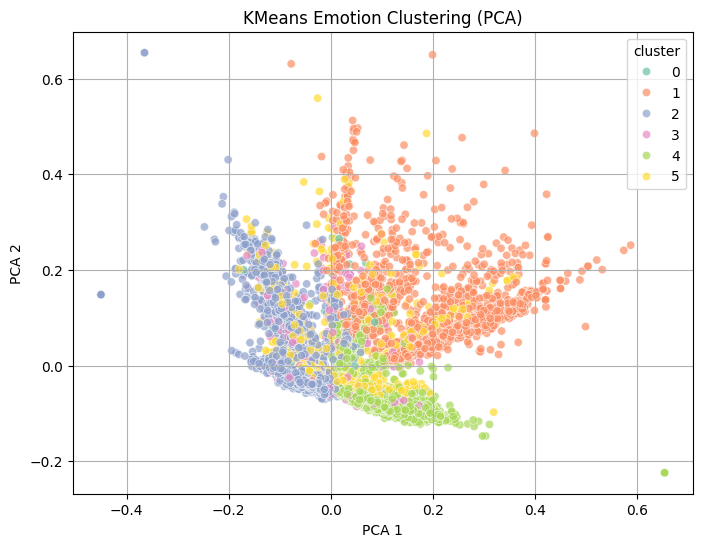

In [25]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_df['cluster'], palette='Set2', alpha=0.7)
plt.title("KMeans Emotion Clustering (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Some clusters appear well-separated, suggesting strong differences in word usage or tone.
However, slight overlaps between clusters may indicate that certain emotions (like fear and sadness) share common linguistic features, making them harder to distinguish both for the model and clustering.

---